### Import Libraries

In [102]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import Libraries
import os
import sys
import datetime as dt
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick

### Set working directories and import csv datasets

In [108]:
# Set working directory
os.chdir(r"E:\Interviews\ACV")

# Import csv to dataframe
dataset_1 = pd.read_csv('dta1.csv', parse_dates = ['joined_timestamp'])
dataset_2 = pd.read_csv('dta2.csv', parse_dates = ['joined_timestamp'])

#dataset_1.head()
#dataset_2.head()

# Merge both datasets for the purpose of stats
dataframe = [dataset_1, dataset_2]

dataset_merge = pd.concat(dataframe)

#dataset_merge.head()


### Data Evaluation

In [59]:
# Get basic info on the dataset

#dataset_1.info()
#dataset_2.info()
dataset_merge.info()

# Get general statistics on the dataset 

dataset_1.describe()
dataset_2.describe()
dataset_merge.describe()

# Check if there are any null values in the dataset

#dataset_1.isna().any()
#dataset_2.isna().any()
dataset_merge.isna().any()

# Check unique values in the users column

#dataset_1["user"].nunique()
#dataset_2["user"].nunique()
dataset_merge['user'].unique()
dataset_merge["joined_timestamp_year"].unique()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6109 entries, 0 to 2352
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user                    6109 non-null   object        
 1   joined_timestamp        6109 non-null   datetime64[ns]
 2   num_auctions_engaged    6109 non-null   int64         
 3   joined_timestamp_month  6109 non-null   object        
 4   joined_timestamp_year   6109 non-null   object        
 5   joined_timestamp_date   6109 non-null   datetime64[ns]
 6   quarter                 6109 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 310.2+ KB


,num_auctions_engaged
count,3756.000000
mean,21.873802
std,5.694396
min,7.000000
25%,17.000000
50%,22.000000
75%,26.000000
max,39.000000


,num_auctions_engaged
count,2353.000000
mean,22.937952
std,6.002867
min,9.000000
25%,17.000000
50%,24.000000
75%,28.000000
max,37.000000


,num_auctions_engaged,quarter
count,6109.000000,6109.000000
mean,22.283680,2.193976
std,5.837678,1.261693
min,7.000000,1.000000
25%,17.000000,1.000000
50%,23.000000,2.000000
75%,27.000000,3.000000
max,39.000000,4.000000


user                      False
joined_timestamp          False
num_auctions_engaged      False
joined_timestamp_month    False
joined_timestamp_year     False
joined_timestamp_date     False
quarter                   False
dtype: bool

array(['buyer', 'seller'], dtype=object)

array(['2016', '2017', '2018'], dtype=object)

### Based on the Above Statistics 

By average the user (seller/buyer) has been engaged in ~ 22 auctions with highest being 39 auctions and lowest being 7 auctions.

There are 3756 and 2353 records in dta1 and dta2 respectively, with no null values.

There are 2 kinds of users which is seller and buyer

User information is available for 3 years between 2016 - 2018

### Creating new data fields to support reporting

Extract year and month from the timestamp

In [41]:
dataset_merge['joined_timestamp_month'] = dataset_merge['joined_timestamp'].dt.strftime('%Y-%m')
dataset_merge.head()

,user,joined_timestamp,num_auctions_engaged,joined_timestamp_month
0,buyer,2016-01-03 02:20:00,22,2016-01
1,buyer,2016-01-03 07:57:00,17,2016-01
2,buyer,2016-01-05 00:43:00,25,2016-01
3,buyer,2016-01-05 03:22:00,20,2016-01
4,buyer,2016-01-05 06:15:00,18,2016-01


Extract year from the timestamp

In [118]:
dataset_merge['joined_timestamp_year'] = dataset_merge['joined_timestamp'].dt.strftime('%Y')
dataset_merge.head()

,user,joined_timestamp,num_auctions_engaged,joined_timestamp_year
0,buyer,2016-01-03 02:20:00,22,2016
1,buyer,2016-01-03 07:57:00,17,2016
2,buyer,2016-01-05 00:43:00,25,2016
3,buyer,2016-01-05 03:22:00,20,2016
4,buyer,2016-01-05 06:15:00,18,2016


Extract date from the timestamp

In [119]:
dataset_merge['joined_timestamp_date'] = dataset_merge['joined_timestamp'].dt.strftime('%Y-%m-%d')

dataset_merge['joined_timestamp_date'] = pd.to_datetime(dataset_merge['joined_timestamp_date'])

dataset_merge.head()

,user,joined_timestamp,num_auctions_engaged,joined_timestamp_year,joined_timestamp_date
0,buyer,2016-01-03 02:20:00,22,2016,2016-01-03
1,buyer,2016-01-03 07:57:00,17,2016,2016-01-03
2,buyer,2016-01-05 00:43:00,25,2016,2016-01-05
3,buyer,2016-01-05 03:22:00,20,2016,2016-01-05
4,buyer,2016-01-05 06:15:00,18,2016,2016-01-05


Split the timestamp into Quarters

In [120]:
dataset_merge['quarter'] = dataset_merge['joined_timestamp_date'].dt.quarter

dataset_merge.head()

,user,joined_timestamp,num_auctions_engaged,joined_timestamp_year,joined_timestamp_date,quarter
0,buyer,2016-01-03 02:20:00,22,2016,2016-01-03,1
1,buyer,2016-01-03 07:57:00,17,2016,2016-01-03,1
2,buyer,2016-01-05 00:43:00,25,2016,2016-01-05,1
3,buyer,2016-01-05 03:22:00,20,2016,2016-01-05,1
4,buyer,2016-01-05 06:15:00,18,2016,2016-01-05,1


### Determine the number of customer that are engaged in auctions for each quarter over 3 years

In [121]:
customer_quarter = dataset_merge.groupby(['quarter']).size().reset_index().rename(columns={0: 'user_count'})

customer_quarter

,quarter,user_count
0,1,2875
1,2,683
2,3,1042
3,4,1509


[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')]

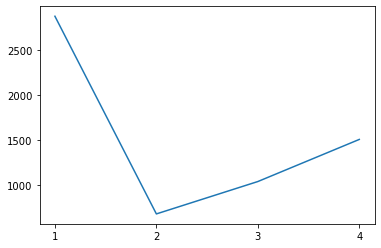

In [90]:
x = np.arange(0,len(customer_quarter),1)
fig, ax = plt.subplots(1,1)
ax.plot(x,customer_quarter['user_count'])
ax.set_xticks(x)
ax.set_xticklabels(customer_quarter['quarter'])
plt.show()

Based on the above Stats we can say that the customer acquisition has been high during the 1st quarter with a sharp dip in 2nd quarter and a linear increase in 3rd and 4th quarter

### Determine the number of customer that are engaged in auctions for each years

In [122]:
customer_year = dataset_merge.groupby(['joined_timestamp_year','user']).size().reset_index().rename(columns={0: 'count_user'})

customer_year

,joined_timestamp_year,user,count_user
0,2016,buyer,479
1,2016,seller,167
2,2017,buyer,2297
3,2017,seller,813
4,2018,buyer,1594
5,2018,seller,759


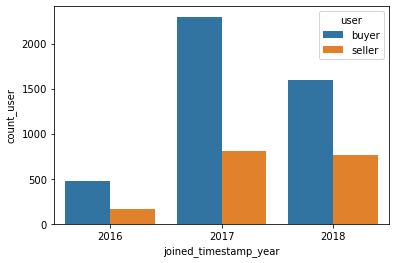

In [128]:
ax = sns.barplot(x="joined_timestamp_year", y="count_user", hue="user", data=customer_year)

Based on the above data we can determine there has been substantial growth with customers from 2016 to 2017.

### Determine the Type of customers acquired during these 3 years

In [94]:
customer_type = dataset_merge.groupby(['user']).size().reset_index().rename(columns={0: 'user_count'})

customer_type

,user,user_count
0,buyer,4370
1,seller,1739


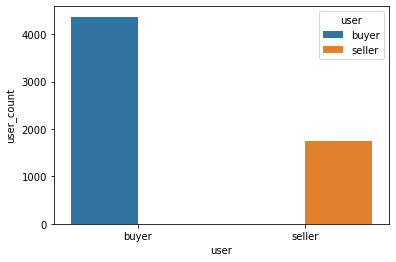

In [126]:
ax = sns.barplot(x="user", y="user_count", hue="user", data=customer_type)

Based on the data the number of Buyers on the platform is more in comparision to the sellers

### Customer acquisition based on type for each quarter

In [91]:
# Grouping the data by quarter and type of user 
customer_quarter = dataset_merge.groupby(['quarter','user']).size().reset_index().rename(columns={0: 'user_count'})

customer_quarter

,quarter,user,user_count
0,1,buyer,1981
1,1,seller,894
2,2,buyer,501
3,2,seller,182
4,3,buyer,742
5,3,seller,300
6,4,buyer,1146
7,4,seller,363


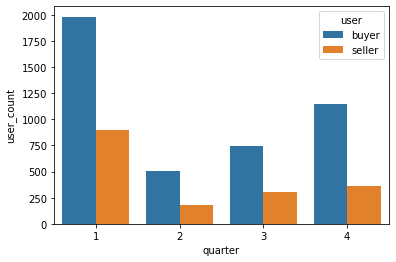

In [92]:
# Bar Plot to get better understanding

ax = sns.barplot(x="quarter", y="user_count", hue="user", data=customer_quarter)

Based on the above graph we can determine the number of Buyers on the ACV platform has been higher compare to sellers. Also the growth of seller over the quarters has been small in comparision to buyers

In [115]:
churn_rate = dataset_merge[["num_auctions_engaged", "user"]]

churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["num_auctions_engaged"] == 0), "No", "Yes"))

sectors = churn_rate .groupby ("churn_label")

churn_rate = pd.DataFrame(sectors["user"].count())

churn_rate ["Churn Rate"] = (churn_rate ["user"]/ sum(churn_rate ["user"]) )*100


#### This data represents the type of clients that have joined the platform at a perticular time and their engagement with the platform by participating in the online auctions.

#### Since the data is presented customer type with join timestamp, we consider the this combination of the data to represent unique customers. This data in comparision with the number of auctions the user has engaged in can provide us some insights into the churn rate. These rates can be broadly classified based on the type of customer that we are losing 

#### Based on the provided data, we can determine that there has been growth the number of customer over the years but the growth seems to have fall short on 2018 when in comparision with the FY 2016-2017